# Data Science & Business Analytics at The Sparks Foundation

# GRIP 2021 May

# TASK#:2 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually using Unsupervised ML

# Author Name: Mahesh Palaskar

# # The iris dataset consists of 4 features (sepal length and width, petal length and width) and 3 species of iris (setosa, versicolor and virginica)

## We will use K-Means Clustering Algorithm for this task.

In [22]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset from sklearn

In [23]:
from sklearn.datasets import load_iris
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
#converting into dataframe
dataframe = pd.DataFrame(data.data, columns = data.feature_names)
#print the first few rows
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
dataframe.shape


(150, 4)

In [26]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [27]:
# checking for null values
dataframe.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [41]:
X = data.data
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Data Visualization

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

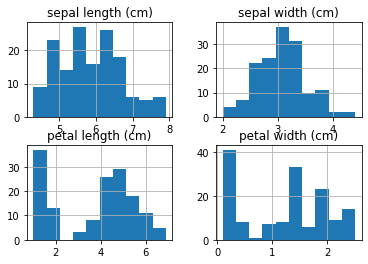

In [31]:
dataframe.hist()

<AxesSubplot:ylabel='Frequency'>

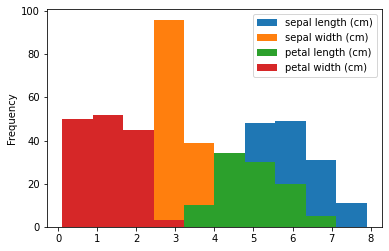

In [32]:
dataframe.plot(kind='hist')

# Applying the K-Means Algorithm to find the optimum number of clusters¶ 

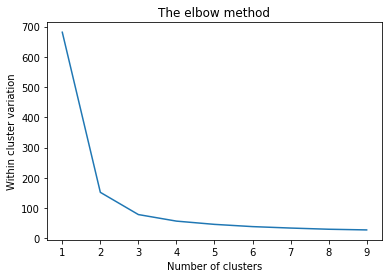

In [33]:
from sklearn.cluster import KMeans

# Experimenting with some values of 'K' to deduce the optimal value

within_cluster = [] 
# within cluster variation which helps to find the optimum no of clusters

for i in range(1, 10):
    km = KMeans(n_clusters = i)
    km.fit(X)
    within_cluster.append(km.inertia_) # calculates wcv

# Now plotting a graph which shows us the 'elbow' i.e. a point after the graph changes from exponential to linear
    
plt.plot(range(1, 10), within_cluster)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster variation') # within cluster variation also known as within cluster sum of squares
plt.show()

## The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data 

# Creating Kmeans clustering classifier

In [42]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualizing the clusters of sepal length and width 

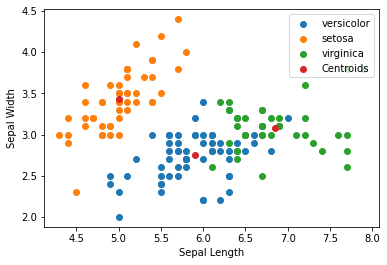

In [44]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], label = 'versicolor')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label = 'setosa')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids.
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [45]:
#Visualizing the clusters of petal length and width

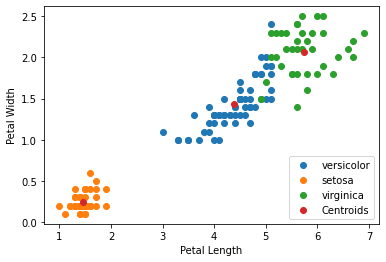

In [46]:

plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], label = 'versicolor')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], label = 'setosa')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3], label = 'virginica')

# Plotting the centroids. This time we're going to use the cluster centres 
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# This is how task-2 is completed !!